<a href="https://colab.research.google.com/github/antonimmo/ebc-jupyternotebooks/blob/master/PoC_spectra_plot_w_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prueba: Graficando espectros $\omega$-k en Colab

Basado en el código [Plot_WF_spectrum_from_database.py](ftp://ecco.jpl.nasa.gov/ECCO2/LLC4320/global/spectral_analysis/programs/Plot_WF_spectrum_from_database.py), intentamos graficar alguno de los espectros $\omega$-k producidos por Torres et al. (2018), a partir de las salidas del modelo LLC4320.

De funcionar, nos permitirá crear más Jupyter Notebooks para procesar estos espectros y en un futuro otros datos.

Para tener acceso a los [espectros](ftp://ecco.jpl.nasa.gov/ECCO2/LLC4320/global/spectral_analysis/), se subieron a mi nube personal de CICESE, y con un _plugin_ de Colab se monta en un directorio virtual desde el que puede leer.

Una manera limpia de tener solamente el código relevante en los notebooks es separar el resto del código en _módulos_ y posteriormente importarlos para (re)usarlos.

### Sobre Jupyter Notebooks

Un Jupyter notebook nos permite combinar texto formateado ([Markdown](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet) + $\LaTeX$) y código de Python, permitiendo además correr comandos tipo terminal (e.g. `pip install`, `apt-get install`) y mostrar gráficas producidas con Matplotlib.

Usado de forma efectiva, nos permite comunicar en un solo documento tanto la ciencia como la técnica detrás de ella.

Ejemplos de otros notebooks se pueden encontrar [aquí](https://github.com/jupyter/jupyter/wiki/A-gallery-of-interesting-Jupyter-Notebooks#mathematics-physics-chemistry-biology).

In [0]:
!pip install netcdf4

In [0]:
# Monta la nube de GoogleDrive en el sistema "local", e importa algunas librerías necesarias
from importlib import reload
from google.colab import drive
drive.mount('/gdrive')
prnt = '/gdrive/My Drive/Tesis/spectral_analysis/'
from shutil import copyfile
tools_fn = 'spectral_analysis_tools.py'

In [0]:
# Carga (o recarga) el módulo que contiene las funciones que usamos para graficar
# * No es la forma más limpia de hacerlo, porque lo ideal es que los módulos fueran locales desde un inicio,
# * pero al menos no es muy intrusivo (requiere poco código) en el notebook
copyfile(prnt+tools_fn,tools_fn)
import spectral_analysis_tools
reload(spectral_analysis_tools) #reload() solo funciona si el módulo ya fue cargado
from spectral_analysis_tools import plot_wk_forvar

In [0]:
# Se define lo que vamos a graficar
season = 'ASO'
var = 'DIV'
dir = prnt+season+'/'+var+'/'
name = 'Spectrum_787_at_LON_-125.0_LAT_31.462.nc'
lat = 31.462

Opening: /gdrive/My Drive/Tesis/spectral_analysis/ASO/DIV/Spectrum_787_at_LON_-125.0_LAT_31.462.nc
::::::::: Dimensions :::::::::
Kiso: (101,)
omega:  (440,)
E:  (101, 440)


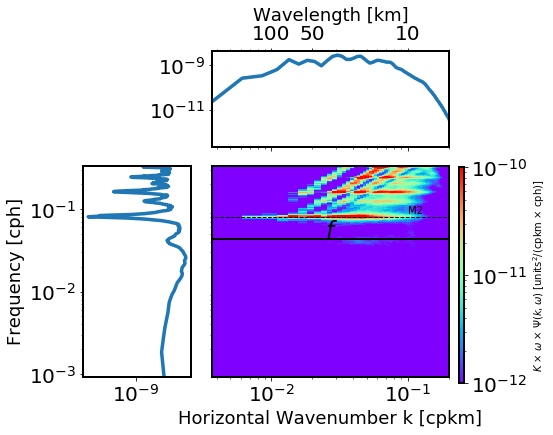

In [7]:
# Y graficamos
plot_wk_forvar(dir+name,var,lat)

### Siguiente paso

Probablemente lo siguiente será tomar todas las cajas de una sola corriente, graficarlas y calcular algo sobre ellas. Después se podría hacer un seleccionador que permita seleccionar la corriente a estudiar, etc.

## Github

Se ha subido a [este repositorio](https://github.com/antonimmo/ebc-jupyternotebooks).

  No se sincroniza automáticamente, así que hay que guardar en el repositorio cada versión estable en la rama `master`.